
# Analysis of the 2017-2018 schol year kindergarten lottery

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#questions">Questions about the data set</a></li>
</ul>


<a id='intro'></a>
## Introduction

4,611 children entered the 2017-2018 San Francisco Unified School District kindergarten lottery. Parents can select multiple schools, and they made more than 45,000 unique choices. 
This Jupyter Noteboook reviews data analyzed by KQED for this news article: https://www.kqed.org/news/11641019/s-f-s-kindergarten-lottery-do-parents-tricks-work, using this base workbook: https://github.com/pickoffwhite/San-Francisco-Kindergarten-Lottery

In addition the the baseline review, already set forth by the KQED team, this notebook looks at 
* those applications that listed three schools 
* the impact of zipcode and CTIP status on choices, assignments, and enrollments

Data limitations: Additional data would help ascertain how selections connect with language requirements for the bilitieracy and immersion programs. And, additional data can help assess how AA and sibling preference impact assignments and enrollment. 

In [1]:
# Importing packages and functions
import pandas as pd
import numpy as np
import datetime # operations to parse dates
import time
import csv
from pprint import pprint #for pretty printing dictionaries
#import ggplot as gplot
import matplotlib as mpl # Still required to change the sizes of plots
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
% matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
lotto = pd.read_csv('./data/kqed_data/20171103_KQED_KinderAssignmentData_201718_k_placement_2017_2018.csv', dtype = object)
df=lotto.copy()

In [3]:
lotto.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4611 entries, 0 to 4610
Data columns (total 98 columns):
StudentNo                                 4611 non-null object
1                                         4611 non-null object
2                                         3856 non-null object
3                                         3441 non-null object
4                                         3028 non-null object
5                                         2657 non-null object
6                                         2361 non-null object
7                                         2114 non-null object
8                                         1938 non-null object
9                                         1804 non-null object
10                                        1668 non-null object
11                                        1147 non-null object
12                                        1027 non-null object
13                                        992 non-null object
14          

In [4]:
lotto.duplicated().sum()

0

In [5]:
lotto.nunique().sum()

8892

In [6]:
lotto.head()

,StudentNo,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,Round 1 Assignment,School Enrolled In As Of 11/03/2017,Student's Ethnicity,Does Student Live In CTIP1 Zone? (y/n),Student's Residential Zip Code
0,1,848,569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,848,848,"White, Not of Hispanic Origin",N,94118
1,2,420,420,537,729,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,729,729,Hispanic,N,94112
2,3,478,589,722,664,539,796,420,413,569,...,NaN,NaN,NaN,NaN,NaN,722,722,"White, Not of Hispanic Origin",N,94131
3,4,782,676,478,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,782,782,Asian or Pacific Islander,N,94127
4,5,420,618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,420,420,Hispanic,Y,94110


# Data Cleaning

In [7]:
pd.options.display.float_format = '{:,.0f}'.format

### Manage CTIP column 

In [8]:
#Replace 'Y' and 'N' with 1 and 0 for 'Not CTIP'
  #1 = yes CTIP #0 = is not a CTIP applicant
lotto['Does Student Live In CTIP1 Zone? (y/n)'].replace({'N':0, 'Y': 1}, inplace=True)

<a id='questions'></a>
# Questions about the data

## Which are the top most requested schools?

## How many students enrolled in their Round 1 top choice school?

> **2864 students... 62% of students** 

There are students that entered the lottery late. The school that those students enroll in becomes their first choice in the data. We are going to exclude them from the dataset. We can tell who they are because they did not received a round one assignment, so their data is null, according to the San Francisco School District. This year there were 141 students that entered the lotter late. 

In [9]:
late = lotto['Round 1 Assignment']
late.isna().sum()

141

In [10]:
lotto.dropna(subset=['Round 1 Assignment']) 

,StudentNo,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,Round 1 Assignment,School Enrolled In As Of 11/03/2017,Student's Ethnicity,Does Student Live In CTIP1 Zone? (y/n),Student's Residential Zip Code
0,1,848,569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,848,848,"White, Not of Hispanic Origin",0,94118
1,2,420,420,537,729,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,729,729,Hispanic,0,94112
2,3,478,589,722,664,539,796,420,413,569,...,NaN,NaN,NaN,NaN,NaN,722,722,"White, Not of Hispanic Origin",0,94131
3,4,782,676,478,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,782,782,Asian or Pacific Islander,0,94127
4,5,420,618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,420,420,Hispanic,1,94110
5,6,838,746,478,876,488,848,729,569,796,...,NaN,NaN,NaN,NaN,NaN,838,838,Asian or Pacific Islander,0,94134
6,7,485,876,513,513,478,862,862,782,760,...,NaN,NaN,NaN,NaN,NaN,760,614,Declines To State,0,94134
7,8,859,449,790,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,859,859,Hispanic,0,94102
8,9,420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,420,420,Declines To State,1,94107
9,10,782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,782,782,Declines To State,0,94112


In [11]:
lotto['got1stchoice'] = np.where(lotto['1'] == lotto['Round 1 Assignment'], '1', '0')

In [12]:
lotto.got1stchoice.value_counts()

1    2864
0    1747
Name: got1stchoice, dtype: int64

In [13]:
lotto.got1stchoice.value_counts(1)

1   1
0   0
Name: got1stchoice, dtype: float64

## How many students enrolled in one of the schools in their first three, five, and ten choices. 
We're filtering down the dataframe to the first five schools, and then seeing how many match.

> **Top 2: 71%** 

> **Top 3: 76%** 

> **Top 5: 82%** 

> **Top 10: 89%** 

In [14]:
lotto2 = lotto[['Round 1 Assignment','1','2']]

In [15]:
lotto['gottop2'] = lotto2.drop("Round 1 Assignment", 1).isin(lotto2["Round 1 Assignment"]).any(1)

In [16]:
lotto.gottop2.value_counts()

True     3299
False    1312
Name: gottop2, dtype: int64

In [17]:
lotto.gottop2.value_counts(True)

True    1
False   0
Name: gottop2, dtype: float64

In [18]:
lotto3 = lotto[['Round 1 Assignment','1','2','3']]

In [19]:
lotto['gottop3'] = lotto3.drop("Round 1 Assignment", 1).isin(lotto3["Round 1 Assignment"]).any(1)

In [20]:
lotto.gottop3.value_counts()

True     3532
False    1079
Name: gottop3, dtype: int64

In [21]:
lotto.gottop3.value_counts(True)

True    1
False   0
Name: gottop3, dtype: float64

How many students enrolled in one of the schools in their top 5 schools. We're filtering down the dataframe to the first ten schools, and then seeing how many match.

In [22]:
lotto5 = lotto[['Round 1 Assignment','1','2','3','4','5']]

In [23]:
lotto['gottop5'] = lotto5.drop("Round 1 Assignment", 1).isin(lotto5["Round 1 Assignment"]).any(1)

In [24]:
lotto.gottop5.value_counts()

True     3811
False     800
Name: gottop5, dtype: int64

In [25]:
lotto.gottop5.value_counts(True)

True    1
False   0
Name: gottop5, dtype: float64

How many students enrolled in one of the schools in their top 10 choices. 
We're filtering down the dataframe to the first ten schools, and then seeing how many match.

In [26]:
lotto10 = lotto[['Round 1 Assignment','1','2','3','4','5', '6', '7', '8', '9', '10']]

In [27]:
lotto['gottop10'] = lotto10.drop("Round 1 Assignment", 1).isin(lotto10["Round 1 Assignment"]).any(1)

In [28]:
lotto.gottop10.value_counts()

True     4148
False     463
Name: gottop10, dtype: int64

In [29]:
lotto.gottop10.value_counts(True)

True    1
False   0
Name: gottop10, dtype: float64

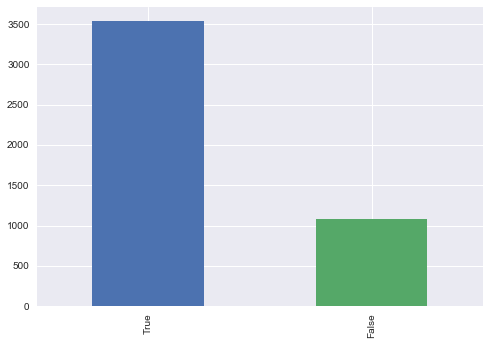

In [30]:
lotto['gottop3'].value_counts().plot(kind='bar');

In [31]:
lotto.reset_index()

,index,StudentNo,1,2,3,4,5,6,7,8,...,Round 1 Assignment,School Enrolled In As Of 11/03/2017,Student's Ethnicity,Does Student Live In CTIP1 Zone? (y/n),Student's Residential Zip Code,got1stchoice,gottop2,gottop3,gottop5,gottop10
0,0,1,848,569,NaN,NaN,NaN,NaN,NaN,NaN,...,848,848,"White, Not of Hispanic Origin",0,94118,1,True,True,True,True
1,1,2,420,420,537,729,NaN,NaN,NaN,NaN,...,729,729,Hispanic,0,94112,0,False,False,True,True
2,2,3,478,589,722,664,539,796,420,413,...,722,722,"White, Not of Hispanic Origin",0,94131,0,False,True,True,True
3,3,4,782,676,478,NaN,NaN,NaN,NaN,NaN,...,782,782,Asian or Pacific Islander,0,94127,1,True,True,True,True
4,4,5,420,618,NaN,NaN,NaN,NaN,NaN,NaN,...,420,420,Hispanic,1,94110,1,True,True,True,True
5,5,6,838,746,478,876,488,848,729,569,...,838,838,Asian or Pacific Islander,0,94134,1,True,True,True,True
6,6,7,485,876,513,513,478,862,862,782,...,760,614,Declines To State,0,94134,0,False,False,False,True
7,7,8,859,449,790,NaN,NaN,NaN,NaN,NaN,...,859,859,Hispanic,0,94102,1,True,True,True,True
8,8,9,420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,420,420,Declines To State,1,94107,1,True,True,True,True
9,9,10,782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,782,782,Declines To State,0,94112,1,True,True,True,True


In [32]:
#Replace 'yes' and 'no' with 1 and 0
lotto = lotto.applymap(lambda x: 1 if x == True else x)
lotto = lotto.applymap(lambda x: 0 if x == False else x)

In [33]:
lotto.head()

,StudentNo,1,2,3,4,5,6,7,8,9,...,Round 1 Assignment,School Enrolled In As Of 11/03/2017,Student's Ethnicity,Does Student Live In CTIP1 Zone? (y/n),Student's Residential Zip Code,got1stchoice,gottop2,gottop3,gottop5,gottop10
0,1,848,569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,848,848,"White, Not of Hispanic Origin",0,94118,1,1,1,1,1
1,2,420,420,537,729,NaN,NaN,NaN,NaN,NaN,...,729,729,Hispanic,0,94112,0,0,0,1,1
2,3,478,589,722,664,539,796,420,413,569,...,722,722,"White, Not of Hispanic Origin",0,94131,0,0,1,1,1
3,4,782,676,478,NaN,NaN,NaN,NaN,NaN,NaN,...,782,782,Asian or Pacific Islander,0,94127,1,1,1,1,1
4,5,420,618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,420,420,Hispanic,1,94110,1,1,1,1,1


## How many students are assigned a school not in their list in round one?

> **3% of students were assigned a school not listed in their list of selected schools** 

In [34]:
randomAssignment = lotto.drop(['StudentNo', 'School Enrolled In As Of 11/03/2017'], axis=1)

In [35]:
randomAssignment['notrandom'] = randomAssignment.drop('Round 1 Assignment', 1).isin(randomAssignment['Round 1 Assignment']).any(1)

In [36]:
randomAssignment.notrandom.value_counts(False)

True     4470
False     141
Name: notrandom, dtype: int64

## How many people put down more than 5, 10 school choices?

> **57% listed more than 5 choices** 

> **36% listed more than 10 choices** 

In [37]:
amountchoices = lotto.drop(['StudentNo', "Does Student Live In CTIP1 Zone? (y/n)",'School Enrolled In As Of 11/03/2017', 'Round 1 Assignment', "Student's Ethnicity", "Student's Residential Zip Code", 'got1stchoice', 'gottop5', 'gottop10'], axis=1)

In [38]:
lotto['choices'] = amountchoices.notnull().sum(axis=1)

In [39]:
#lotto['morethan3'] = np.where(lotto['choices'] > 3, 'yes', 'no')
lotto['listedmorethan3'] = np.where(lotto['choices'] > 3, 1, 0)

In [40]:
lotto.listedmorethan3.value_counts('yes')

1   1
0   0
Name: listedmorethan3, dtype: float64

In [41]:
lotto['listedmorethan5'] = np.where(lotto['choices'] > 5, 1, 0)

In [42]:
lotto.listedmorethan5.value_counts()

1    3028
0    1583
Name: listedmorethan5, dtype: int64

In [43]:
lotto.listedmorethan5.value_counts('yes')

1   1
0   0
Name: listedmorethan5, dtype: float64

In [44]:
lotto['listedmorethan10'] = np.where(lotto['choices'] > 10, 1,0)

In [45]:
lotto.listedmorethan10.value_counts()

0    2807
1    1804
Name: listedmorethan10, dtype: int64

In [46]:
lotto.listedmorethan10.value_counts('yes')

0   1
1   0
Name: listedmorethan10, dtype: float64

In [47]:
lotto['listedlessthan10'] = np.where(lotto['choices'] < 10, 1,0)

In [48]:
lotto.listedlessthan10.value_counts('yes')

1   1
0   0
Name: listedlessthan10, dtype: float64

In [49]:
lotto['listedlessthan5'] = np.where(lotto['choices'] < 5, 1,0)

In [50]:
lotto.listedlessthan5.value_counts('yes')

0   1
1   0
Name: listedlessthan5, dtype: float64

## Does putting down more than ten schools impact the chance of getting your first choice?

> **5-10 choices seemed to improve the odds of getting a first choice** 

In [51]:
lotto.groupby(['got1stchoice', 'listedmorethan10']).size()

got1stchoice  listedmorethan10
0             0                    706
              1                   1041
1             0                   2101
              1                    763
dtype: int64

In [52]:
lotto.groupby(['got1stchoice', 'listedmorethan5']).size()

got1stchoice  listedmorethan5
0             0                   196
              1                  1551
1             0                  1387
              1                  1477
dtype: int64

In [53]:
lotto.groupby(['got1stchoice', 'listedlessthan5']).size()

got1stchoice  listedlessthan5
0             0                  1665
              1                    82
1             0                  1776
              1                  1088
dtype: int64

## CTIP

In [54]:
cols = list(lotto.columns.values)
print(cols)

['StudentNo', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', 'Round 1 Assignment', 'School Enrolled In As Of 11/03/2017', "Student's Ethnicity", 'Does Student Live In CTIP1 Zone? (y/n)', "Student's Residential Zip Code", 'got1stchoice', 'gottop2', 'gottop3', 'gottop5', 'gottop10', 'choices', 'listedmorethan3', 'listedmorethan5', 'listedmorethan10', 'listedlessthan10', 'listedlessthan5']


In [55]:
#seperate out the data columns that I will be working with 
lotto_results = lotto.drop(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92'], axis=1)
lotto_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4611 entries, 0 to 4610
Data columns (total 17 columns):
StudentNo                                 4611 non-null object
Round 1 Assignment                        4470 non-null object
School Enrolled In As Of 11/03/2017       4043 non-null object
Student's Ethnicity                       4389 non-null object
Does Student Live In CTIP1 Zone? (y/n)    4611 non-null int64
Student's Residential Zip Code            4611 non-null object
got1stchoice                              4611 non-null object
gottop2                                   4611 non-null int64
gottop3                                   4611 non-null int64
gottop5                                   4611 non-null int64
gottop10                                  4611 non-null int64
choices                                   4611 non-null int64
listedmorethan3                           4611 non-null int64
listedmorethan5                           4611 non-null int64
listedmorethan10   

In [56]:
#convert data types
lotto_results = lotto_results.convert_objects(convert_numeric=True)
lotto_results.dtypes

/Users/Irene/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


StudentNo                                   int64
Round 1 Assignment                        float64
School Enrolled In As Of 11/03/2017       float64
Student's Ethnicity                        object
Does Student Live In CTIP1 Zone? (y/n)      int64
Student's Residential Zip Code              int64
got1stchoice                                int64
gottop2                                     int64
gottop3                                     int64
gottop5                                     int64
gottop10                                    int64
choices                                     int64
listedmorethan3                             int64
listedmorethan5                             int64
listedmorethan10                            int64
listedlessthan10                            int64
listedlessthan5                             int64
dtype: object

In [57]:
lotto_results.dtypes

StudentNo                                   int64
Round 1 Assignment                        float64
School Enrolled In As Of 11/03/2017       float64
Student's Ethnicity                        object
Does Student Live In CTIP1 Zone? (y/n)      int64
Student's Residential Zip Code              int64
got1stchoice                                int64
gottop2                                     int64
gottop3                                     int64
gottop5                                     int64
gottop10                                    int64
choices                                     int64
listedmorethan3                             int64
listedmorethan5                             int64
listedmorethan10                            int64
listedlessthan10                            int64
listedlessthan5                             int64
dtype: object

In [58]:
lotto_results.head()

,StudentNo,Round 1 Assignment,School Enrolled In As Of 11/03/2017,Student's Ethnicity,Does Student Live In CTIP1 Zone? (y/n),Student's Residential Zip Code,got1stchoice,gottop2,gottop3,gottop5,gottop10,choices,listedmorethan3,listedmorethan5,listedmorethan10,listedlessthan10,listedlessthan5
0,1,848,848,"White, Not of Hispanic Origin",0,94118,1,1,1,1,1,4,1,0,0,1,1
1,2,729,729,Hispanic,0,94112,0,0,0,1,1,6,1,1,0,1,0
2,3,722,722,"White, Not of Hispanic Origin",0,94131,0,0,1,1,1,17,1,1,1,0,0
3,4,782,782,Asian or Pacific Islander,0,94127,1,1,1,1,1,5,1,0,0,1,0
4,5,420,420,Hispanic,1,94110,1,1,1,1,1,4,1,0,0,1,1


## How many CTIP applicants are there?

> **705** 

In [60]:
lotto_results['Does Student Live In CTIP1 Zone? (y/n)'].value_counts()

0    3906
1     705
Name: Does Student Live In CTIP1 Zone? (y/n), dtype: int64

## Did any of the CTIP applicants apply late?

> **no** 

In [61]:
ctip_1 = lotto_results[(lotto_results['Does Student Live In CTIP1 Zone? (y/n)']==1)]
ctip_late = ctip_1['Round 1 Assignment']
ctip_late.isna().sum()

0

## How many CTIP applicants were assigned their top choice school? compared to non CTIP applicants?

> **14% or 88 CTIP applicants out of 705 received their top choice school in the first round...compared to 46% of non CTIP applicants** Note: non CTIP applicants includes AA designation students and students with an older sibling already at their top choice school...both factors would increase their likelihood of receiving their top choice according to SF Parents For Public Schools. 

In [62]:
lotto_results['got1stchoice'] = np.where(lotto_results['Round 1 Assignment'] == lotto_results['School Enrolled In As Of 11/03/2017'], 0, 1)

In [63]:
lotto_results.head()

,StudentNo,Round 1 Assignment,School Enrolled In As Of 11/03/2017,Student's Ethnicity,Does Student Live In CTIP1 Zone? (y/n),Student's Residential Zip Code,got1stchoice,gottop2,gottop3,gottop5,gottop10,choices,listedmorethan3,listedmorethan5,listedmorethan10,listedlessthan10,listedlessthan5
0,1,848,848,"White, Not of Hispanic Origin",0,94118,0,1,1,1,1,4,1,0,0,1,1
1,2,729,729,Hispanic,0,94112,0,0,0,1,1,6,1,1,0,1,0
2,3,722,722,"White, Not of Hispanic Origin",0,94131,0,0,1,1,1,17,1,1,1,0,0
3,4,782,782,Asian or Pacific Islander,0,94127,0,1,1,1,1,5,1,0,0,1,0
4,5,420,420,Hispanic,1,94110,0,1,1,1,1,4,1,0,0,1,1


In [64]:
lotto_results.groupby(['Does Student Live In CTIP1 Zone? (y/n)', 'got1stchoice']).size()

Does Student Live In CTIP1 Zone? (y/n)  got1stchoice
0                                       0               2667
                                        1               1239
1                                       0                617
                                        1                 88
dtype: int64

## Where did CTIP applicants end up?

In [65]:
#import master list of schools from part 1
codes = pd.read_csv('./data/master/master_schools_list.csv')
df_codes = codes.copy()

In [66]:
codes.head()

,Unnamed: 0,school_name_x,district_code,cds_code,school_name_y,campus_address,zipcode
0,0,Alamo ES,413,"6,040,695",Alamo Elementary School,250 23RD AVE,94121
1,1,Alvarado ES,420,"6,040,703",Alvarado Elementary School,625 DOUGLASS ST,94114
2,2,Argonne ES,435,"6,040,737",Argonne Elementary School,680 18TH AVE,94121
3,3,Bryant ES,456,"6,040,778",Bryant Early Education / Bryant Elementary,2641 25TH ST,94110
4,4,Carver ES,625,"6,093,496","Carver, Dr. George Washington Carver Elementar...",1360 OAKDALE AVE,94124


In [67]:
#drop unnecessary column, rename zipcode column, and reorder columns
codes.drop(['Unnamed: 0'], axis=1)
codes.rename(columns={'zipcode' : 'campus_zipcode'}, inplace=True)
codes = codes[['district_code', 'cds_code', 'school_name_x', 
       'school_name_y', 'campus_address', 'campus_zipcode']]

In [68]:
codes.columns

Index(['district_code', 'cds_code', 'school_name_x', 'school_name_y',
       'campus_address', 'campus_zipcode'],
      dtype='object')

In [69]:
# change data types
codes = codes.infer_objects()

In [70]:
codes.columns

Index(['district_code', 'cds_code', 'school_name_x', 'school_name_y',
       'campus_address', 'campus_zipcode'],
      dtype='object')

In [71]:
#drop Rnd 1 assignment school as here we will only look at where the student ultimately enrolled
ctip_enrolled = lotto_results.drop(['Round 1 Assignment'], axis=1)

In [72]:
#filter data for ctip only students
ctip_enrolled = lotto_results.loc[lotto_results['Does Student Live In CTIP1 Zone? (y/n)'] == 1]

In [73]:
#rename one of the columns to make it easier to merge data with the master schools list
ctip_enrolled.rename(columns={'School Enrolled In As Of 11/03/2017' : 'district_code'}, inplace=True)

/Users/Irene/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [74]:
ctip_enrolled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 4 to 4610
Data columns (total 17 columns):
StudentNo                                 705 non-null int64
Round 1 Assignment                        705 non-null float64
district_code                             678 non-null float64
Student's Ethnicity                       669 non-null object
Does Student Live In CTIP1 Zone? (y/n)    705 non-null int64
Student's Residential Zip Code            705 non-null int64
got1stchoice                              705 non-null int64
gottop2                                   705 non-null int64
gottop3                                   705 non-null int64
gottop5                                   705 non-null int64
gottop10                                  705 non-null int64
choices                                   705 non-null int64
listedmorethan3                           705 non-null int64
listedmorethan5                           705 non-null int64
listedmorethan10                   

In [75]:
#check the data so far
ctip_enrolled

,StudentNo,Round 1 Assignment,district_code,Student's Ethnicity,Does Student Live In CTIP1 Zone? (y/n),Student's Residential Zip Code,got1stchoice,gottop2,gottop3,gottop5,gottop10,choices,listedmorethan3,listedmorethan5,listedmorethan10,listedlessthan10,listedlessthan5
4,5,420,420,Hispanic,1,94110,0,1,1,1,1,4,1,0,0,1,1
8,9,420,420,Declines To State,1,94107,0,1,1,1,1,3,0,0,0,1,1
11,12,676,676,Declines To State,1,94107,0,1,1,1,1,34,1,1,1,0,0
35,36,485,485,Asian or Pacific Islander,1,94124,0,1,1,1,1,7,1,1,0,1,0
36,37,760,760,Hispanic,1,94124,0,1,1,1,1,3,0,0,0,1,1
49,50,723,723,Hispanic,1,94110,0,1,1,1,1,3,0,0,0,1,1
55,56,420,420,Hispanic,1,94110,0,1,1,1,1,7,1,1,0,1,0
66,67,603,603,Hispanic,1,94110,0,1,1,1,1,5,1,0,0,1,0
69,70,714,517,Hispanic,1,94124,1,1,1,1,1,5,1,0,0,1,0
78,79,786,786,Asian or Pacific Islander,1,94115,0,1,1,1,1,3,0,0,0,1,1


In [76]:
#check for duplicates
ctip_enrolled.duplicated('StudentNo').value_counts()

False    705
dtype: int64

In [77]:
# merget the data with the master schools list
ctip_enrolled_w_school_zip = pd.merge(ctip_enrolled, codes, on='district_code', how='outer')

In [78]:
# check for duplicates inserted during the merge
ctip_enrolled_w_school_zip.duplicated('StudentNo').value_counts()

False    706
True       8
dtype: int64

In [79]:
#drop the second instance of duplicates inserted during the merge
ctip_enrolled_w_school_zip.drop_duplicates('StudentNo', inplace = True)

In [80]:
# check for duplicates inserted during the merge
ctip_enrolled_w_school_zip.duplicated('StudentNo').value_counts()

False    706
dtype: int64

In [81]:
#investigate the last row with nan values
ctip_enrolled_w_school_zip.iloc[-1]

StudentNo                                                                        NaN
Round 1 Assignment                                                               NaN
district_code                                                                    476
Student's Ethnicity                                                              NaN
Does Student Live In CTIP1 Zone? (y/n)                                           NaN
Student's Residential Zip Code                                                   NaN
got1stchoice                                                                     NaN
gottop2                                                                          NaN
gottop3                                                                          NaN
gottop5                                                                          NaN
gottop10                                                                         NaN
choices                                                          

In [82]:
#drop the last row
ctip_enrolled_w_school_zip = ctip_enrolled_w_school_zip[:-1]

In [83]:
#check the data
ctip_enrolled_w_school_zip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 704
Data columns (total 22 columns):
StudentNo                                 705 non-null float64
Round 1 Assignment                        705 non-null float64
district_code                             678 non-null float64
Student's Ethnicity                       669 non-null object
Does Student Live In CTIP1 Zone? (y/n)    705 non-null float64
Student's Residential Zip Code            705 non-null float64
got1stchoice                              705 non-null float64
gottop2                                   705 non-null float64
gottop3                                   705 non-null float64
gottop5                                   705 non-null float64
gottop10                                  705 non-null float64
choices                                   705 non-null float64
listedmorethan3                           705 non-null float64
listedmorethan5                           705 non-null float64
listedmorethan

In [84]:
# add a new column with 1s for those students that ended up at a school in the same zipcode as their home
ctip_enrolled_w_school_zip['enrolled_in_home_zipcode'] = np.where(ctip_enrolled_w_school_zip['Student\'s Residential Zip Code'] == ctip_enrolled_w_school_zip['campus_zipcode'], 0, 1)

In [85]:
ctip_enrolled_w_school_zip.enrolled_in_home_zipcode.value_counts()

1    510
0    195
Name: enrolled_in_home_zipcode, dtype: int64

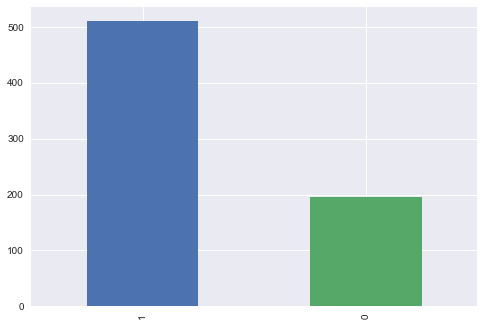

In [86]:
ctip_enrolled_w_school_zip['enrolled_in_home_zipcode'].value_counts().plot(kind='bar');

# Export data

In [87]:
lotto.to_csv('./data/exports/2_lotto_edited.csv')
lotto_results.to_csv('./data/exports/2_lotto_results.csv')
ctip_enrolled_w_school_zip.to_csv('./data/exports/2_ctip_enrolled_w_school_zip.csv')
ctip_1.to_csv('./data/exports/2_ctip_1.csv')

# Wrapping Up

In [ ]:
import pdfkit
pdfkit.from_file('KQED_SanFrancisco_kindergarten_lottery.html', 'KQED_SanFrancisco_kindergarten_lottery.pdf')